# Estimation

- All the probability functions that we have covered so far are families of models in the sense that they are defined by at least one parameter.

- For **example** the Poisson model is defined by the occurrence rate, $\lambda$. Changing $\lambda$ changes the probabilities associated with the Poisson as we saw in the plots created in the ```distribution``` file.

- The main goal of estimation is to find the value of an *estimator* that can be constructed given data 


## Maximum Likelihood

**Definition 5.2.1:** let $k_{1}, k_{2}, \dots k_{n}$ be a random sample of size $n$ from the discrete pdf $p_{X}(k ; \theta)$, where $\theta$ is an unknown parameter. The *likelihood function* $L(\theta)$ is the product of the pdf evaluated at the $n$ $k_{i}$'s:

$$L(\theta)=\prod_{i=1}^{n}P_{X}\left(k_{i} ; \theta\right)$$.

The basic idea behind maximum likelihood estimation is to choose as the estimate for $\theta$ the value of the parameter that maximizes the "likelihood" of "observing" the sample.

**Comment:** because we are looking for the value of $\theta$ that maximizes $L(\theta)$, taking a transformation of the function does not alter the location of the maximizer. It is more convenient to work with the natural logarithm of the likelihood function:

$$\text{ln} L(\theta)=\sum_{i=1}^{n}\text{ln}P_{X}\left( k_{i} ; \theta\right)$$.

### Maximum likelihood for the Poisson random variable

Remember that the pdf of the Poisson distribution is given by $P_{X}(k) = \frac{e^{-\lambda} \lambda^{k}}{k !}$. Assuming we have a random sample from the Poisson distribution, i.e., $k_{1}, \dots, k_{n}$ where each $k_{i}$ distributes Poisson with parameter $\lambda$. Because we assume that we have a random sample, each observation $i$ is independent from the others. Therefore, the probability of observing that sample is given by:

$$L(\lambda)=\prod_{i=1}^{n} e^{-\lambda} \frac{\lambda^{k_{i}}}{k_{i} !}=e^{-n \lambda} \lambda^{\sum_{i=1}^{n} k_{i}} \frac{1}{\prod_{i=1}^{n} k_{i} !}.$$

Again, it is convenient to take the natural logarithm of the likelihood function:

$$\ln L(\lambda)=-n \lambda+\left(\sum_{i=1}^{n} k_{i}\right) \ln \lambda-\ln \prod_{i=1}^{n} k_{i} !$$

To maximize this function, let's use the first order conditions for a maximum 

$$\frac{d \ln L(\lambda)}{d \lambda}=-n+\frac{\sum_{i=1}^{n} k_{i}}{\lambda}=0,$$

which implies that $\lambda_{e}=\frac{\sum_{i=1}^{n} k_{i}}{n}=\bar{k}$. You can check the second derivative to convince yourself that this is a maximum.

### R implementation:

Before jumping into the code, note that the term $\ln \prod_{i=1}^{n} k_{i} !$ does not depend on lambda so that maximizing $\ln L(\lambda)$, is equivalent to maximize

$$\ln L(\lambda)=-n \lambda+\left(\sum_{i=1}^{n} k_{i}\right) \ln \lambda$$

In [15]:
likelihood <- function(l,k){
    n <- length(k)
    lnl <- -n*l + sum(k)*log(l)
    return(-lnl)
}

Let's simulate some data from a Poisson distribution with parameter $\lambda=1.5$ and in the case that we have a random sample of size $n=100$. 

In [8]:
n <- 100
l <- 1.5
k <- rpois(n, l)

We can use the function ```optim()``` to calculate in R the value of $\lambda$ that maximizes the log likelihood function. The first input is an initial value for $\lambda$. In this case I set that value to be 0. The second input is the objective function to minimize (that is why I used a negative sign in the likelihood function definition). The third input is the data that we will use to evaluate the likelihood function. The last input is the maximization method.

In [18]:
optim(0.5, likelihood, k = k,method="BFGS")$par

[1] 1.259978

Here we use the option ```par``` to get only the value of $\lambda$ (```l```) that maximizes the likelihood. In this case the result is $\lambda_{e} = 1.26$. We would expect that by increasing the sample, the value of $\lambda_{e}$ will get closer to the real value of $\lambda = 1.5$. Let's simulate a new random sample of 1000 Poisson random variables.

In [19]:
n2 <- 1000
k2 <- rpois(n2, l)
optim(0.5, likelihood, k = k2,method="BFGS")$par

[1] 1.444

As expected, the value of the maximum likelihood estimator is closer to 1.5 when the sample size increases to 1000.

In [24]:
samples <- 10:1000
estimators <- vector()
set.seed(42)

for(n in samples){
    estimators <- append(estimators, optim(1, likelihood, k = rpois(n, l),method="BFGS")$par)
}

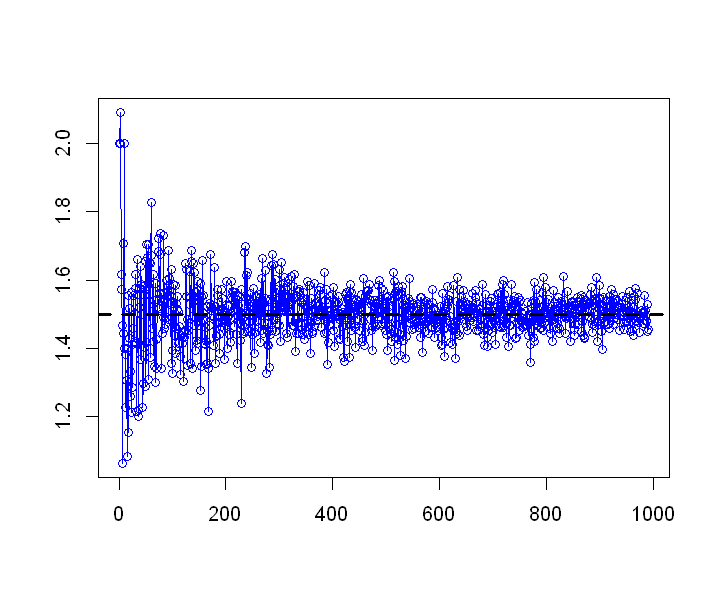

In [29]:
options(repr.plot.width=6, repr.plot.height=5)
plot(estimators,type="o", col="blue",ann=FALSE)
abline(h=l, col="black",lwd=3, lty=2)